In [17]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from features.dblp import run as dblp_extract
from features.delicious import run as delicious_extract
from features.movielens import run as movielens_extract
from features.autoencoder import train_encoder
from models.NpGlm import NpGlm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [18]:
dataset = 'dblp'
delta = 1
observation_window = 6
n_snapshots = 6
censoring_ratio = 0.5
epochs = 1000
latent_factor = 2
max_iter = 2000

In [19]:
feature_extractor = {
    'dblp': dblp_extract,
    'delicious': delicious_extract,
    'movielens': movielens_extract,
}[dataset]

X, Y, T = feature_extractor(
    delta=delta,
    observation_window=observation_window,
    n_snapshots=n_snapshots,
    censoring_ratio=censoring_ratio,
)

print(X.shape)

20:57:28: generating papers ...
20:57:36: parsing dataset ...
20:57:36: generating samples ...
20:57:37: extracting ...
20:57:38: parsing dataset ...
20:57:38: extracting ...
20:57:39: parsing dataset ...
20:57:39: extracting ...
20:57:40: parsing dataset ...
20:57:40: extracting ...
20:57:40: parsing dataset ...
20:57:40: extracting ...
20:57:41: parsing dataset ...
20:57:41: extracting ...


(3410, 6, 19)


In [20]:
X_train, X_test, Y_train, Y_test, T_train, T_test = train_test_split(X, Y, T, test_size=0.2, stratify=Y, random_state=12345)

In [21]:
encoder, history = train_encoder(X_train, epochs=epochs, latent_factor=latent_factor)

Epoch 1/1000
3/3 [==============================] - 1s 133ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 2/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 3/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 4/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 5/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 6/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 7/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 8/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 9/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 10/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 11

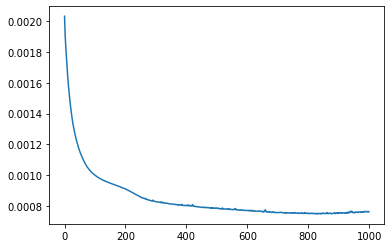

In [22]:
plt.plot(history.history['val_loss'])

In [23]:
X_train_encoded, X_test_encoded = encoder.predict(X_train), encoder.predict(X_test)

In [24]:
model = NpGlm()
model.fit(X_train_encoded, Y_train, T_train, max_iter=max_iter)

Iteration 0: 	 train loss: 0.3192 	 val error: 2.2350
Iteration 1: 	 train loss: 0.3131 	 val error: 2.1911
Iteration 2: 	 train loss: 0.3078 	 val error: 2.1728
Iteration 3: 	 train loss: 0.3026 	 val error: 2.1728
Iteration 4: 	 train loss: 0.2973 	 val error: 2.1728
Iteration 5: 	 train loss: 0.2921 	 val error: 2.1728
Iteration 6: 	 train loss: 0.2869 	 val error: 2.1728
Iteration 7: 	 train loss: 0.2816 	 val error: 2.1728
Iteration 8: 	 train loss: 0.2764 	 val error: 2.1728
Iteration 9: 	 train loss: 0.2712 	 val error: 2.1735
Iteration 10: 	 train loss: 0.2660 	 val error: 2.1743
Iteration 11: 	 train loss: 0.2609 	 val error: 2.1751
Iteration 12: 	 train loss: 0.2557 	 val error: 2.1759
Iteration 13: 	 train loss: 0.2505 	 val error: 2.1763
Iteration 14: 	 train loss: 0.2453 	 val error: 2.1763
Iteration 15: 	 train loss: 0.2402 	 val error: 2.1763
Iteration 16: 	 train loss: 0.2351 	 val error: 2.1763
Iteration 17: 	 train loss: 0.2299 	 val error: 2.1763
Iteration 18: 	 trai

In [25]:
MAE = model.evaluate(X_test_encoded, Y_test, T_test)
print(f'MAE: {MAE}')

MAE: 2.1981837101504116
